In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
from pylab import rcParams
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 
from scipy.cluster.hierarchy import linkage, cut_tree
%matplotlib inline
rcParams['figure.figsize'] = (14,10)
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [4]:
z = pd.read_pickle("/content/drive/MyDrive/CHINA_DATASET/brofinalll.plk")

In [93]:
set(z.iloc[:,0])

{'Adarsh Nagar, Jaipur - RSPCB',
 'Airoli, Navi Mumbai - MPCB',
 'Alandi, Pune - IITM',
 'Alandur Bus Depot, Chennai - CPCB',
 'Alipur, Delhi - DPCC',
 'Anand Kala Kshetram, Rajamahendravaram - APPCB',
 'Anand Vihar, Delhi - DPCC',
 'Anand Vihar, Hapur - UPPCB',
 'Anthoni Pillai Nagar, Gummidipoondi - TNPCB',
 'Ardhali Bazar, Varanasi - UPPCB',
 'Arumbakkam, Chennai - TNPCB',
 'Arya Nagar, Bahadurgarh - HSPCB',
 'Asansol Court Area, Asansol - WBPCB',
 'Ashok Nagar, Udaipur - RSPCB',
 'Ashok Vihar, Delhi - DPCC',
 'Aya Nagar, Delhi - IMD',
 'BTM Layout, Bengaluru - CPCB',
 'BWSSB Kadabesanahalli, Bengaluru - CPCB',
 'Ballygunge, Kolkata - WBPCB',
 'Bandhavgar Colony, Satna - Birla Cement',
 'Bandra Kurla Complex, Mumbai - IITM',
 'Bandra, Mumbai - MPCB',
 'Bapuji Nagar, Bengaluru - KSPCB',
 'Bawana, Delhi - DPCC',
 'Belur Math, Howrah - WBPCB',
 'Bhopal Chauraha, Dewas - MPPCB',
 'Bhosari, Pune - IITM',
 'Bidhannagar, Kolkata - WBPCB',
 'Bollaram Industrial Area, Hyderabad - TSPCB',
 'B

In [55]:
z['year'] = [d.year for d in z.real_dates]
z['month'] = [d.strftime('%b') for d in z.real_dates]

In [75]:
p = z.groupby(["month","station"],as_index=False)["pm25"].mean()

In [77]:
import datetime as dt
p["month"] = pd.to_datetime(p.month, format='%b', errors='coerce').dt.month

In [79]:
p = p.sort_values(by="month")

In [102]:
set(p.iloc[:,1])

{'Adarsh Nagar, Jaipur - RSPCB',
 'Airoli, Navi Mumbai - MPCB',
 'Alandi, Pune - IITM',
 'Alandur Bus Depot, Chennai - CPCB',
 'Alipur, Delhi - DPCC',
 'Anand Kala Kshetram, Rajamahendravaram - APPCB',
 'Anand Vihar, Delhi - DPCC',
 'Anand Vihar, Hapur - UPPCB',
 'Anthoni Pillai Nagar, Gummidipoondi - TNPCB',
 'Ardhali Bazar, Varanasi - UPPCB',
 'Arumbakkam, Chennai - TNPCB',
 'Arya Nagar, Bahadurgarh - HSPCB',
 'Asansol Court Area, Asansol - WBPCB',
 'Ashok Nagar, Udaipur - RSPCB',
 'Ashok Vihar, Delhi - DPCC',
 'Aya Nagar, Delhi - IMD',
 'BTM Layout, Bengaluru - CPCB',
 'BWSSB Kadabesanahalli, Bengaluru - CPCB',
 'Ballygunge, Kolkata - WBPCB',
 'Bandhavgar Colony, Satna - Birla Cement',
 'Bandra Kurla Complex, Mumbai - IITM',
 'Bandra, Mumbai - MPCB',
 'Bapuji Nagar, Bengaluru - KSPCB',
 'Bawana, Delhi - DPCC',
 'Belur Math, Howrah - WBPCB',
 'Bhopal Chauraha, Dewas - MPPCB',
 'Bhosari, Pune - IITM',
 'Bidhannagar, Kolkata - WBPCB',
 'Bollaram Industrial Area, Hyderabad - TSPCB',
 'B

In [94]:
x = {}
for i in range(len(p)):
  if p.iloc[i,1]=="Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB":
    if "dates" in x:
      x["dates"].append(p.iloc[i,0])
    else:
      x["dates"]=[p.iloc[i,0]]
    if p.iloc[i,1] in x:
      x["Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB"].append(p.iloc[i,2])
    else:
      x["Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB"]=[p.iloc[i,2]]
  elif p.iloc[i,1]=="Asansol Court Area, Asansol - WBPCB":
    if p.iloc[i,1] in x:
      x["Asansol Court Area, Asansol - WBPCB"].append(p.iloc[i,2])
    else:
      x["Asansol Court Area, Asansol - WBPCB"]=[p.iloc[i,2]]
  elif p.iloc[i,1]=="Tata Stadium, Jorapokhar - JSPCB":
    if p.iloc[i,1] in x:
      x["Tata Stadium, Jorapokhar - JSPCB"].append(p.iloc[i,2])
    else:
      x["Tata Stadium, Jorapokhar - JSPCB"]=[p.iloc[i,2]]
  

In [87]:
df

,"Vidayagiri, Bagalkot - KSPCB",dates,"Talcher Coalfields,Talcher - OSPCB","SFTI Kusdihra, Gaya - BSPCB"
0,87.101011,1,161.129180,55.981376
1,63.257150,2,109.795200,39.539074
2,51.541845,3,74.339897,33.682568
3,50.006947,4,70.658512,28.868050
4,61.157428,5,68.166250,32.440904
5,55.390487,6,57.967854,19.403338
6,33.779279,7,39.323688,15.500530
7,29.435314,8,32.886773,16.080201
8,36.759654,9,43.092358,20.657299
9,80.639327,10,114.569277,31.449948


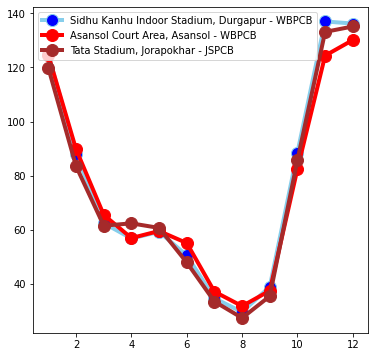

In [95]:
df = pd.DataFrame(x)
plt.figure(figsize=(6, 6))

plt.plot( 'dates', 'Sidhu Kanhu Indoor Stadium, Durgapur - WBPCB', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'dates', 'Asansol Court Area, Asansol - WBPCB', data=df, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.plot( 'dates', 'Tata Stadium, Jorapokhar - JSPCB', data=df, marker='o', markerfacecolor='brown', markersize=12, color='brown', linewidth=4)
plt.legend()
plt.savefig("x1.png")

In [106]:
x = {}
for i in range(len(p)):
  if p.iloc[i,1]=="Chhoti Gwaltoli, Indore - MPPCB":
    if "dates" in x:
      x["dates"].append(p.iloc[i,0])
    else:
      x["dates"]=[p.iloc[i,0]]
    if p.iloc[i,1] in x:
      x["Chhoti Gwaltoli, Indore - MPPCB"].append(p.iloc[i,2])
    else:
      x["Chhoti Gwaltoli, Indore - MPPCB"]=[p.iloc[i,2]]
  elif p.iloc[i,1]=="Burari Crossing, Delhi - IMD":
    if p.iloc[i,1] in x:
      x["Burari Crossing, Delhi - IMD"].append(p.iloc[i,2])
    else:
      x["Burari Crossing, Delhi - IMD"]=[p.iloc[i,2]]
  elif p.iloc[i,1]=="Civil Lines,  Ajmer - RSPCB":
    if p.iloc[i,1] in x:
      x["Civil Lines,  Ajmer - RSPCB"].append(p.iloc[i,2])
    else:
      x["Civil Lines,  Ajmer - RSPCB"]=[p.iloc[i,2]]
  

In [104]:
x

{'Burari Crossing, Delhi - IMD': [133.73240545050936,
  88.0739065586319,
  72.86585653558025,
  73.5355523346537,
  67.29941657982414,
  51.62026158720825,
  35.849331708519834,
  31.150997771539394,
  38.94251056453153,
  104.43669460452023,
  170.56105561572943,
  169.59941308683668],
 'Civil Lines,  Ajmer - RSPCB': [62.7032353916319,
  57.131479704383494,
  46.37287964667662,
  44.79353266831933,
  53.78603570487084,
  47.07288713665278,
  34.62956588296404,
  29.460802809675343,
  30.17581590907494,
  55.00587132260856,
  67.1184992186262,
  55.08063873885271],
 'PWD Grounds, Vijayawada - APPCB': [68.54378142971376,
  62.50220047352739,
  53.68513277206102,
  47.73461892493606,
  53.78120929187428,
  46.08834672330991,
  27.818488775531144,
  21.57792741523768,
  29.203538641276626,
  57.86068167410813,
  99.70581145739826,
  97.38665295512075],
 'dates': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

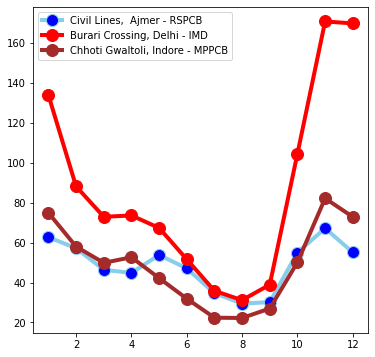

In [107]:
df = pd.DataFrame(x)
plt.figure(figsize=(6, 6))

plt.plot( 'dates', 'Civil Lines,  Ajmer - RSPCB', data=df, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'dates', 'Burari Crossing, Delhi - IMD', data=df, marker='o', markerfacecolor='red', markersize=12, color='red', linewidth=4)
plt.plot( 'dates', 'Chhoti Gwaltoli, Indore - MPPCB', data=df, marker='o', markerfacecolor='brown', markersize=12, color='brown', linewidth=4)
plt.legend()
plt.savefig("x2.png")